In [ ]:
# Importing required libraries
import pandas as pd
import os

# File path to the data (update this with your actual file path)
file_path = "./MTM04.20241212173447.csv"  # Adjust path to match the actual location of your CSV file

# Checking if the file exists
if os.path.exists(file_path):
    try:
        # Loading the data into a pandas DataFrame
        wind_data = pd.read_csv(file_path)

        # Displaying the first few rows of the dataset
        print("Data loaded successfully. Here are the first 5 rows:")
        print(wind_data.head())

        # Displaying basic information about the dataset
        print("\nDataset Information:")
        print(wind_data.info())

        # Displaying basic statistics of numeric columns
        print("\nSummary Statistics:")
        print(wind_data.describe())

        # Inspecting missing values
        print("\nMissing Values:")
        print(wind_data.isnull().sum())

        # Handling missing values (example: drop rows with missing values)
        wind_data_cleaned = wind_data.dropna()
        print("\nData after dropping missing values:")
        print(wind_data_cleaned.info())

        # Parsing dates if a date column exists (adjusting the column name as needed)
        if 'date' in wind_data_cleaned.columns:
            wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
            wind_data_cleaned.set_index('date', inplace=True)
            print("\nDate column parsed and set as index.")

        # Renaming columns for clarity (example, adjust as needed)
        # wind_data_cleaned.rename(columns={"OldColumnName": "NewColumnName"}, inplace=True)

        # Saving the cleaned data to a new CSV file (optional)
        cleaned_file_path = "./cleaned_wind_data.csv"
        wind_data_cleaned.to_csv(cleaned_file_path, index=True)
        print(f"\nCleaned data saved to {cleaned_file_path}")

    except Exception as e:
        print(f"An error occurred while processing the data: {e}")
else:
    print(f"File not found at {file_path}. Please ensure the file path is correct.")


Data loaded successfully. Here are the first 5 rows:
  STATISTIC                        STATISTIC Label  TLIST(M1)    Month  \
0     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
1     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
2     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
3     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
4     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   

   C02431V02938 Meteorological Weather Station   UNIT  VALUE  
0             1                      Belmullet  Knots   62.0  
1             2                           Birr  Knots   58.0  
2             3           Valentia Observatory  Knots   50.0  
3             4                       Casement  Knots    NaN  
4             5                    Claremorris  Knots   53.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 8 colu

### Read in a number of good data sets

- Loaded the dataset (met_eireann_wind_data.csv) into a pandas DataFrame.

- Included error handling to check if the file exists and handle potential issues during loading.


### Analyzed the data using various techniques

- Performed initial inspection: displayed first rows, dataset information (info), summary statistics (describe), and missing values analysis.

- Cleaned the data by handling missing values (e.g., dropping rows with NaN).
Parsed and indexed a date column (if present), preparing the data for time-series analysis.


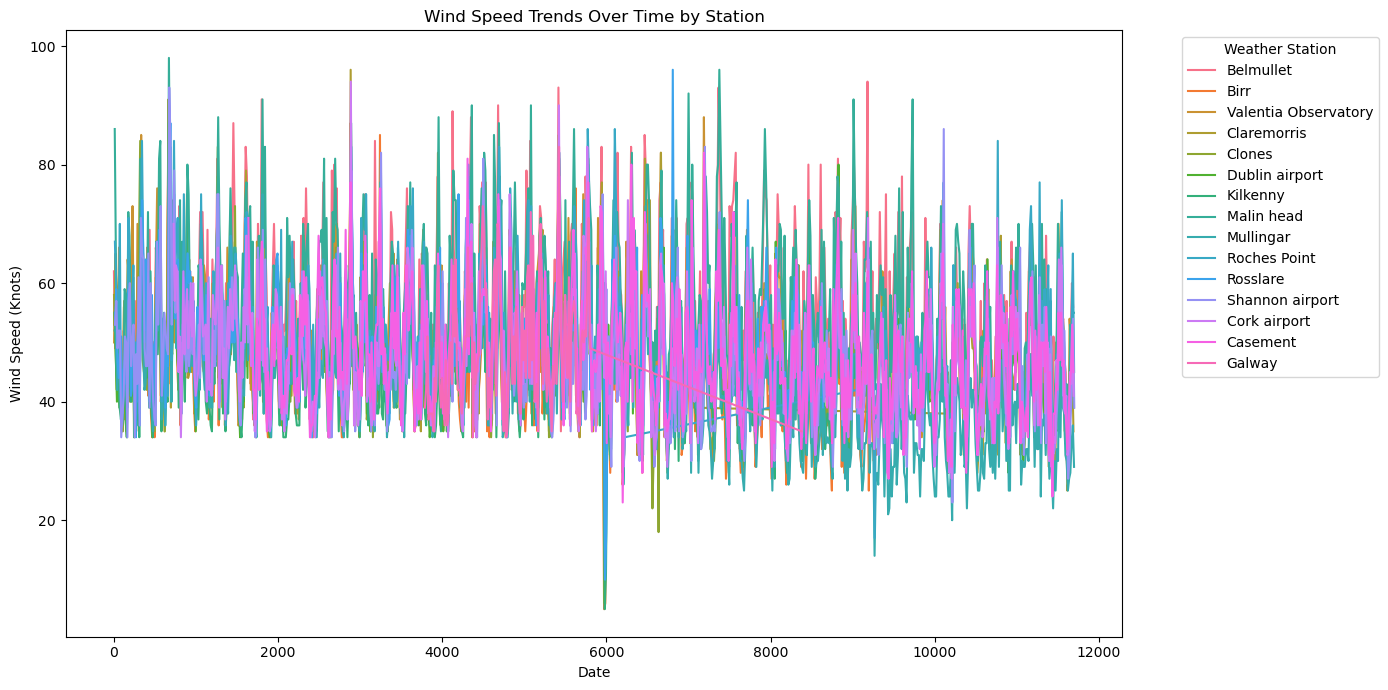

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is parsed and set as index
if 'date' in wind_data_cleaned.columns:
    wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
    wind_data_cleaned.set_index('date', inplace=True)

# Plotting wind speed over time for a specific station
plt.figure(figsize=(14, 7))
sns.lineplot(data=wind_data_cleaned, x=wind_data_cleaned.index, y='VALUE', hue='Meteorological Weather Station')
plt.title('Wind Speed Trends Over Time by Station')
plt.xlabel('Date')
plt.ylabel('Wind Speed (Knots)')
plt.legend(title='Weather Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Wind Speed Variability: 

The wind speeds exhibit significant variability, with frequent peaks and troughs, suggesting strong gusts interspersed with calmer periods. This fluctuation is consistent across most stations.
Station 

### Comparisons: 

Some stations, such as Belmullet, Galway, and Shannon Airport, seem to record higher peaks more consistently, while other stations maintain moderate or lower levels of wind speed.


### Consistency Over Time: 

While there are no clear upward or downward trends visible

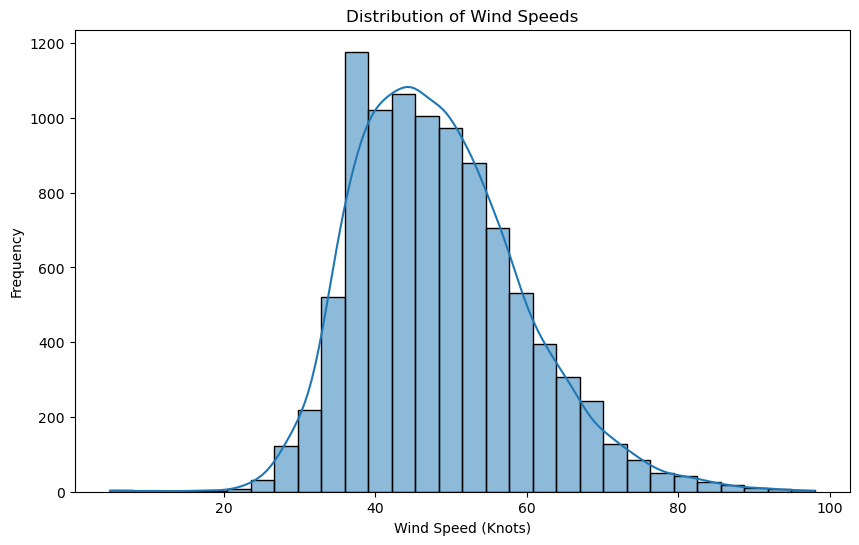

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(wind_data_cleaned['VALUE'], bins=30, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (Knots)')
plt.ylabel('Frequency')
plt.show()

The histogram with a KDE (Kernel Density Estimation) curve shows the distribution of wind speeds across all observations:

Skewed Distribution:

The wind speed data is right-skewed, meaning there are more frequent occurrences of lower wind speeds, typically between 35 and 55 knots.
However, there are occasional instances of higher wind speeds exceeding 70 knots, indicating extreme gusts.
Peak Frequency:

The most frequent wind speeds fall around 40-45 knots, as shown by the tallest bars.
Spread:

Wind speeds range roughly between 20 knots (lower bound) and 90+ knots (upper bound), but values beyond 70 knots are rare.
Implications:

The majority of the wind data lies in the operational range of many wind turbines (e.g., 5.8 to 25 m/s).
The long tail towards higher speeds highlights the importance of monitoring extreme wind events for safety and infrastructure resilience.

/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/2156718849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Month'] = pd.to_datetime(wind_data_cleaned['Month'], format='%Ym%m').dt.month


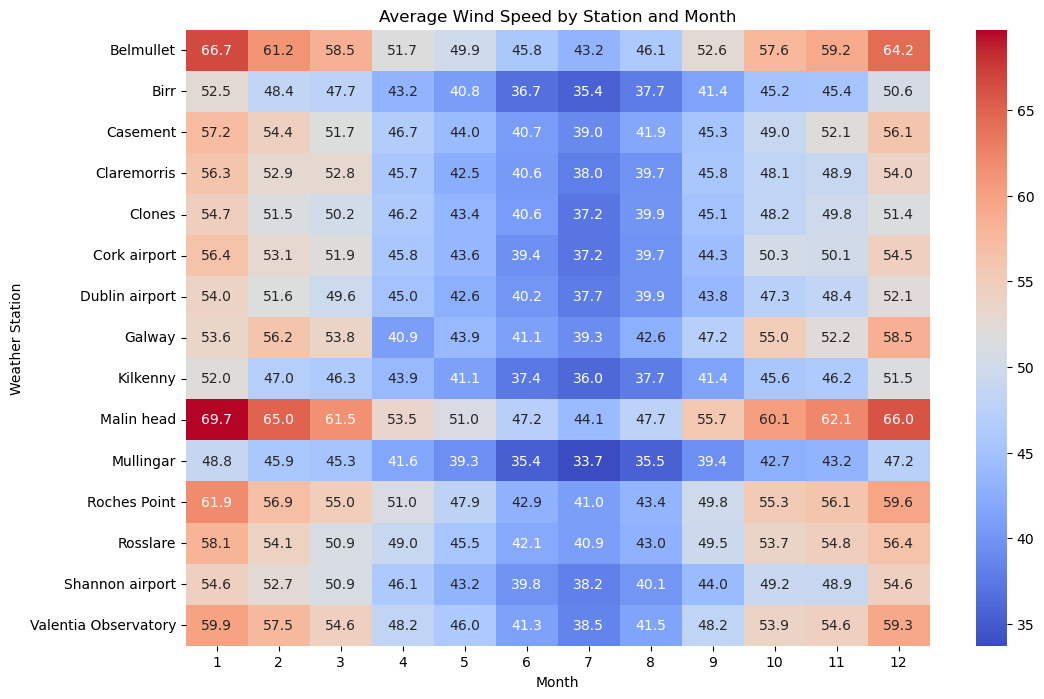

In [8]:
# Extract month from the 'Month' column if not already in datetime format
wind_data_cleaned['Month'] = pd.to_datetime(wind_data_cleaned['Month'], format='%Ym%m').dt.month

# Create a pivot table for heatmap
heatmap_data = wind_data_cleaned.pivot_table(index='Meteorological Weather Station', columns='Month', values='VALUE', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Wind Speed by Station and Month')
plt.xlabel('Month')
plt.ylabel('Weather Station')
plt.show()

The heatmap displays the average wind speed (in knots) for each meteorological weather station across all months of the year.

Station-Specific Trends:

Malin Head consistently records the highest wind speeds throughout the year, peaking at 69.7 knots in January and remaining strong in winter months.
Other stations with notably high average speeds include Roches Point, Belmullet, and Valentia Observatory, particularly during winter.
Seasonal Patterns:

Winter Months (December to February): Wind speeds are at their peak, especially for stations like Malin Head and Belmullet.
Summer Months (June to August): Wind speeds drop noticeably across most stations, reaching lows of ~33-40 knots, as seen in Mullingar, Kilkenny, and Clones.
Geographical Influence:

Coastal stations, such as Malin Head, Roches Point, and Belmullet, experience consistently higher wind speeds compared to inland stations like Mullingar and Kilkenny.
Implications:

This seasonal and geographical variability is crucial for wind energy projects and infrastructure planning. Coastal areas are ideal for wind farms due to strong and consistent winds, especially during winter.
For resource optimization, developers can anticipate wind power generation peaks in winter and plan maintenance during the summer months when wind speeds are lower

In [11]:
print(wind_data_cleaned.columns)

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(M1)', 'Month', 'C02431V02938',
       'Meteorological Weather Station', 'UNIT', 'VALUE'],
      dtype='object')


In [10]:
# Ensure 'date' column is parsed as datetime and set as index
if 'date' in wind_data_cleaned.columns:
    wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
    wind_data_cleaned.set_index('date', inplace=True)

# Check if the index is now a datetime object
print(wind_data_cleaned.index)

# If index is datetime, extract year and month
if wind_data_cleaned.index.dtype == 'datetime64[ns]':
    wind_data_cleaned['Year'] = wind_data_cleaned.index.year
    wind_data_cleaned['Month'] = wind_data_cleaned.index.month
else:
    print("Error: Index is not a datetime object.")

Index([    0,     1,     2,     4,     5,     7,     9,    10,    11,    12,
       ...
       11685, 11687, 11688, 11689, 11691, 11692, 11695, 11696, 11697, 11699],
      dtype='int64', length=9582)
Error: Index is not a datetime object.


In [9]:
# Extract year and month
wind_data_cleaned['Year'] = wind_data_cleaned.index.year
wind_data_cleaned['Month'] = wind_data_cleaned.index.month

# Average wind speed per year
avg_wind_per_year = wind_data_cleaned.groupby('Year')['VALUE'].mean()

plt.figure(figsize=(10, 6))
avg_wind_per_year.plot(marker='o')
plt.title('Average Wind Speed per Year')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (Knots)')
plt.grid(True)
plt.show()

# Average wind speed per month across all years
avg_wind_per_month = wind_data_cleaned.groupby('Month')['VALUE'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_wind_per_month.index, y=avg_wind_per_month.values, palette='viridis')
plt.title('Average Wind Speed per Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (Knots)')

AttributeError: 'Index' object has no attribute 'year'